# KNN(K Nearest Neighbours) Lazy Learning Algorithm --- Classificaion algorithm
1. Choose K
2. Calucate Distance
3. Finding K's Nearest Neighbours
4. Voting for Classification or Taking Average for Regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [12]:
print('Feature names : ',cancer.feature_names)
print('---------------------------------------------------------------------')
print("Traget Names : ",cancer.target_names)
print('---------------------------------------------------------------------')
print("Data of cancer : ",cancer.data)
print('---------------------------------------------------------------------')
print("Target Values : ",cancer.target)

Feature names :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
---------------------------------------------------------------------
Traget Names :  ['malignant' 'benign']
---------------------------------------------------------------------
Data of cancer :  [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.0

In [30]:
Xtrain,Xtest,ytrain,ytest = train_test_split(cancer.data,cancer.target,
                                             stratify = cancer.target,
                                             random_state = 5)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [31]:
training_accuracy = []
testing_accuracy = []

neighbors_settings = range(1,11)

for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(Xtrain,ytrain)
    training_accuracy.append(clf.score(Xtrain,ytrain))
    testing_accuracy.append(clf.score(Xtest,ytest))

In [32]:
print(training_accuracy)

[1.0, 0.9671361502347418, 0.9553990610328639, 0.9507042253521126, 0.9389671361502347, 0.9342723004694836, 0.9342723004694836, 0.9295774647887324, 0.931924882629108, 0.9295774647887324]


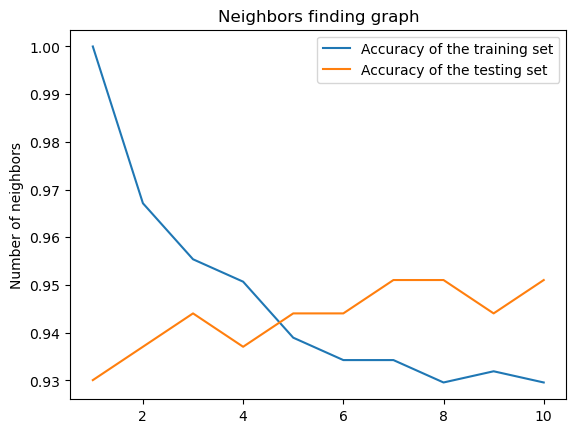

In [33]:
plt.title('Neighbors finding graph')
plt.plot(neighbors_settings, training_accuracy,label = 'Accuracy of the training set')
plt.plot(neighbors_settings, testing_accuracy,label = 'Accuracy of the testing set')
plt.ylabel('Accuracy')
plt.ylabel('Number of neighbors')
plt.legend()
plt.show()

In [34]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(Xtrain,ytrain)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [44]:
p_data = [12.67,17.3,81.2,489.9,0.102,0.0766,0.031,0.021,0.017,0.059,0.2,0.9,1.56,17.6,0.006,0.009,0.01,0.0006,0.009,0.0001,13.7,21.1,88.7,574.4,0.013,0.012,0.010,0.05,0.2,0.0688]
p_data = np.array(p_data).reshape(1,30)
output = clf.predict(p_data)
print(output)

[1]


In [38]:
data = {'Brightness' : [40,50,60,10,70,60,25],
         'Saturation ': [20,50,90,25,70,10,80],
         'Class' : ['Red','Blue','Blue','Red','Blue','Red','Blue']}
demo = pd.DataFrame(data)
demo


,Brightness,Saturation,Class
0,40,20,Red
1,50,50,Blue
2,60,90,Blue
3,10,25,Red
4,70,70,Blue
5,60,10,Red
6,25,80,Blue


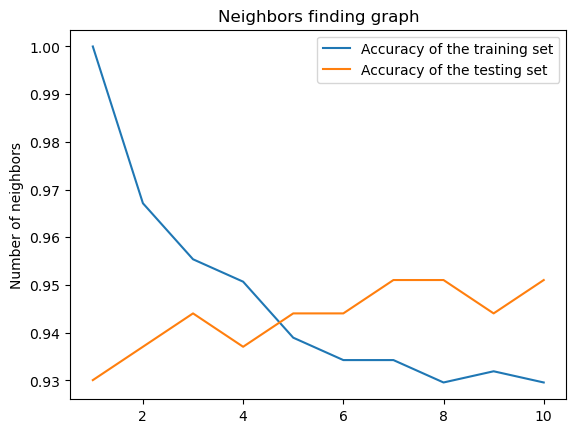

In [45]:
plt.title('Neighbors finding graph')
plt.plot(neighbors_settings, training_accuracy,label = 'Accuracy of the training set')
plt.plot(neighbors_settings, testing_accuracy,label = 'Accuracy of the testing set')
plt.ylabel('Accuracy')
plt.ylabel('Number of neighbors')
plt.legend()
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()
demo.Class = le.fit_transform(demo.Class)

X = demo[['Brightness','Saturation ']]
y = demo['Class']

In [50]:
demo.columns

Index(['Brightness', 'Saturation ', 'Class'], dtype='object')

In [53]:
hello = KNeighborsClassifier(n_neighbors = 4)
hello.fit(X,y)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [54]:
hello = KNeighborsClassifier(n_neighbors = 3)
hello.fit(X,y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [55]:
hello.predict([[20,35]])[0]

C:\Users\Kiriti\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


np.int64(1)

In [58]:
data = pd.DataFrame({
    'height' : [167,182,176,173,172,174,169,173,170],
    'weight' : [51,62,69,64,65,56,58,57,55],
    'Class' : ['Underweight','Normal','Normal','Normal','Normal','Underweight','Normal','Normal','Normal']
})

In [59]:
data

,height,weight,Class
0,167,51,Underweight
1,182,62,Normal
2,176,69,Normal
3,173,64,Normal
4,172,65,Normal
5,174,56,Underweight
6,169,58,Normal
7,173,57,Normal
8,170,55,Normal


In [60]:
hg = le.fit_transform(data.Class)
X = data[['height','weight']]
y = data['Class']

In [61]:
hgm = KNeighborsClassifier(n_neighbors = 4)
hgm.fit(X,y)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [62]:
hgm.predict([[170,57]])[0]

C:\Users\Kiriti\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Normal'

In [73]:
df = pd.read_csv('creditcard.csv')

In [74]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [75]:
# Get basic statistics
print(df.describe())

# Check for missing values (there are none in the original dataset)
print(df.isnull().sum().max())

print(df.columns)

                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.00000

In [76]:
print(df['Class'].value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


In [84]:
X = df.drop(['Class'],axis = 1)
y = df["Class"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10,stratify = y)

In [85]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# This is the line that creates your training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Random Forest F1 Score: 0.9998


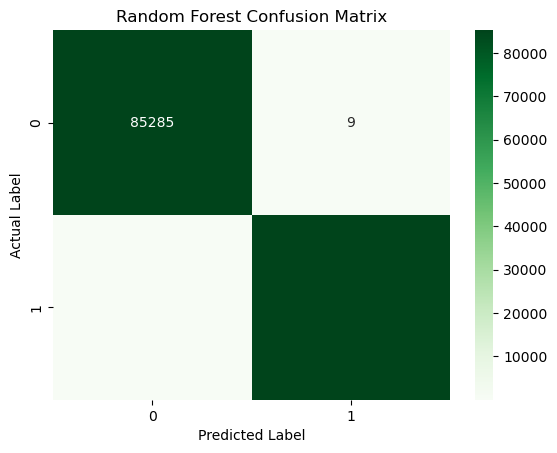

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model
# n_estimators is the number of trees in the forest.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train it on the same resampled data
print("Training Random Forest...")
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the new model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest F1 Score: {f1_rf:.4f}")

# Plot its confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()